In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  JPM


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM
Date,,,,,
2015-01-02,46.511139,46.860957,46.198533,46.280406,12600000
2015-01-05,45.067192,46.354826,44.829017,46.191082,20100600
2015-01-06,43.898640,45.216046,43.429732,45.134173,29074100
2015-01-07,43.965637,44.575961,43.667917,44.575961,23843200
2015-01-08,44.948112,45.327706,44.635509,44.635509,16971100


In [12]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, JPM)   2744 non-null   float64
 1   (High, JPM)    2744 non-null   float64
 2   (Low, JPM)     2744 non-null   float64
 3   (Open, JPM)    2744 non-null   float64
 4   (Volume, JPM)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [13]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1[0]

137.65058209425968

In [16]:
print(y_test)

Date
2023-09-25    136.982315
2023-09-26    137.785690
2023-09-27    139.496445
2023-09-28    137.067383
2023-09-29    135.885910
                 ...    
2025-11-20    296.681732
2025-11-21    296.661835
2025-11-24    301.639374
2025-11-25    306.258545
2025-11-26    311.674103
Name: Target, Length: 547, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  17.637009664812897
Root Mean Squared Error:  4.1996439926275775
R2 Score:  0.9932754629119551


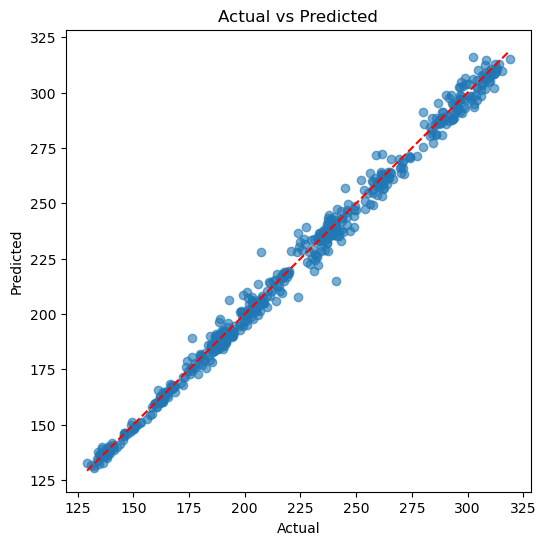

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
import joblib 
joblib.dump(lr, "JPM.pkl")
model = joblib.load("JPM.pkl")